In [1]:
import pandas as pd
import numpy as np
import hist
import matplotlib as mpl
import mplhep
import mplhep.error_estimation
mpl.style.use(mplhep.style.ROOT)
import matplotlib.pyplot as plt

In [2]:
pedestals = pd.read_csv('data/pedestals-default.csv')
# define a unique ID for each channel to make histograms a bit easier to make
pedestals['uid'] = pedestals['link'].astype(str)+'_'+pedestals['channel']

## Value Ranges
- The TOT is always -1 meaning that no channel ever goes into TOT.
- ADC is between 1 and 63 (inclusive) which is suspicious, **need to double check decoding**
- ADCt-1 is between 129 and 207, also suspicious, **need to double check decoding**
- TOA ranges from 2 to 771

In [3]:
pedestals[['adc','adc_tm1','tot','toa']].max()

adc         63
adc_tm1    207
tot         -1
toa        771
dtype: int64

In [4]:
pedestals[['adc','adc_tm1','tot','toa']].min()

adc          1
adc_tm1    129
tot         -1
toa          2
dtype: int64

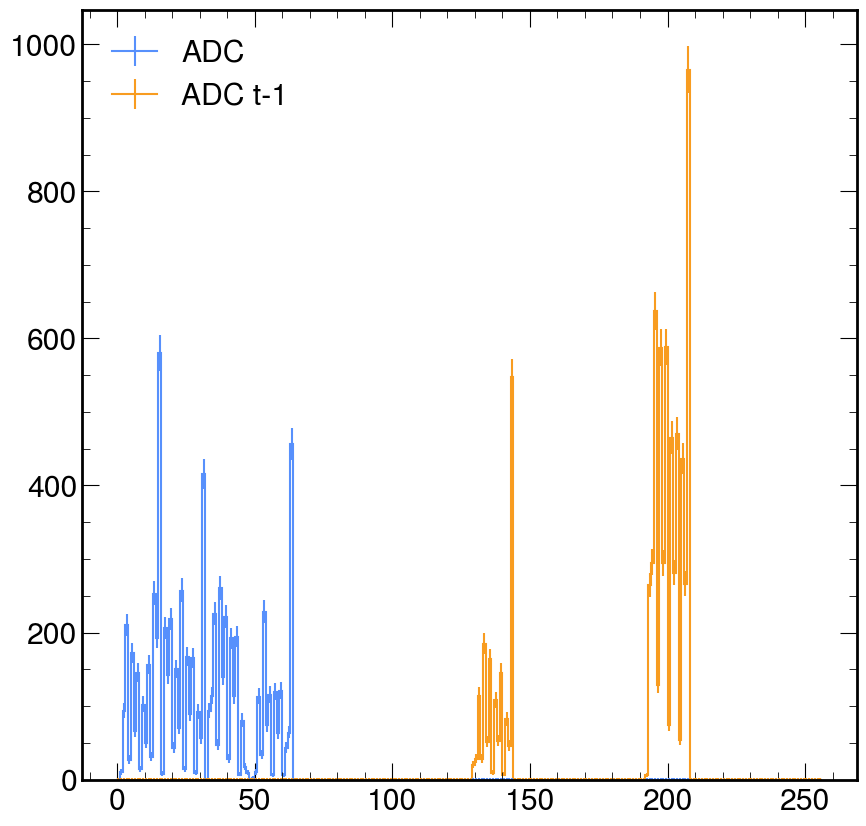

In [23]:
adcmax=256

(
    hist.Hist.new
    .Reg(adcmax,0,adcmax)
    .Double()
).fill(
    pedestals.adc
).plot(label='ADC')

(
    hist.Hist.new
    .Reg(adcmax,0,adcmax)
    .Double()
).fill(
    pedestals.adc_tm1
).plot(label='ADC t-1')

plt.xlabel(None)
plt.legend()
plt.show()

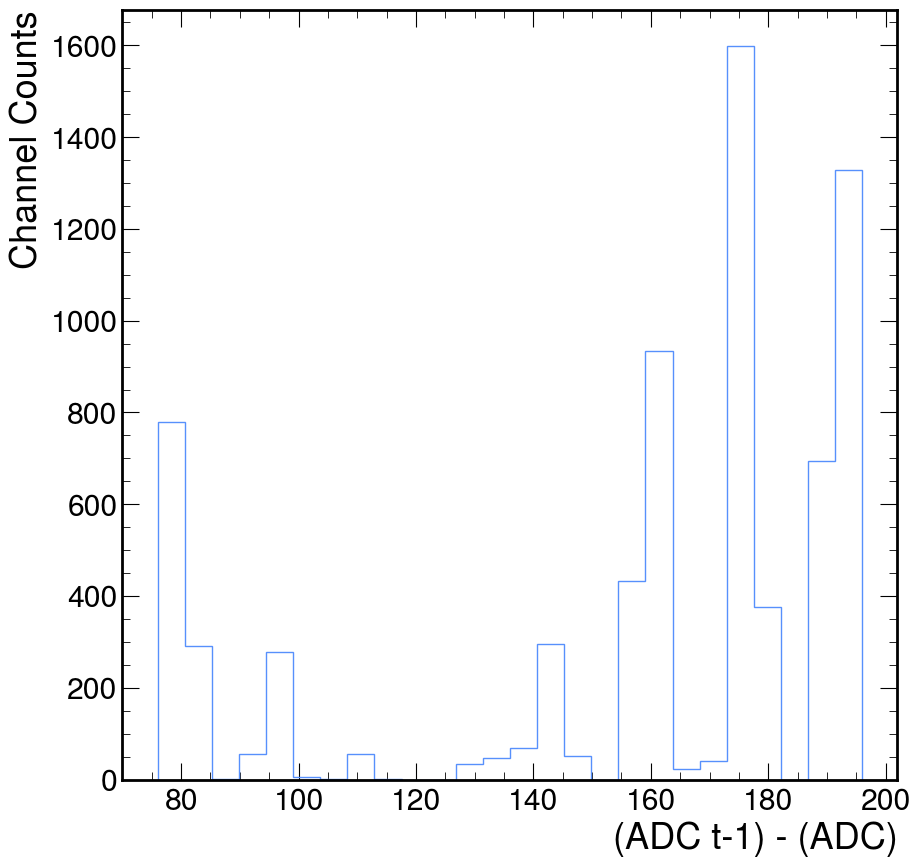

In [22]:
plt.hist(pedestals.adc_tm1-pedestals.adc, bins='auto', histtype='step')
plt.ylabel('Channel Counts')
plt.xlabel('(ADC t-1) - (ADC)')
plt.show()

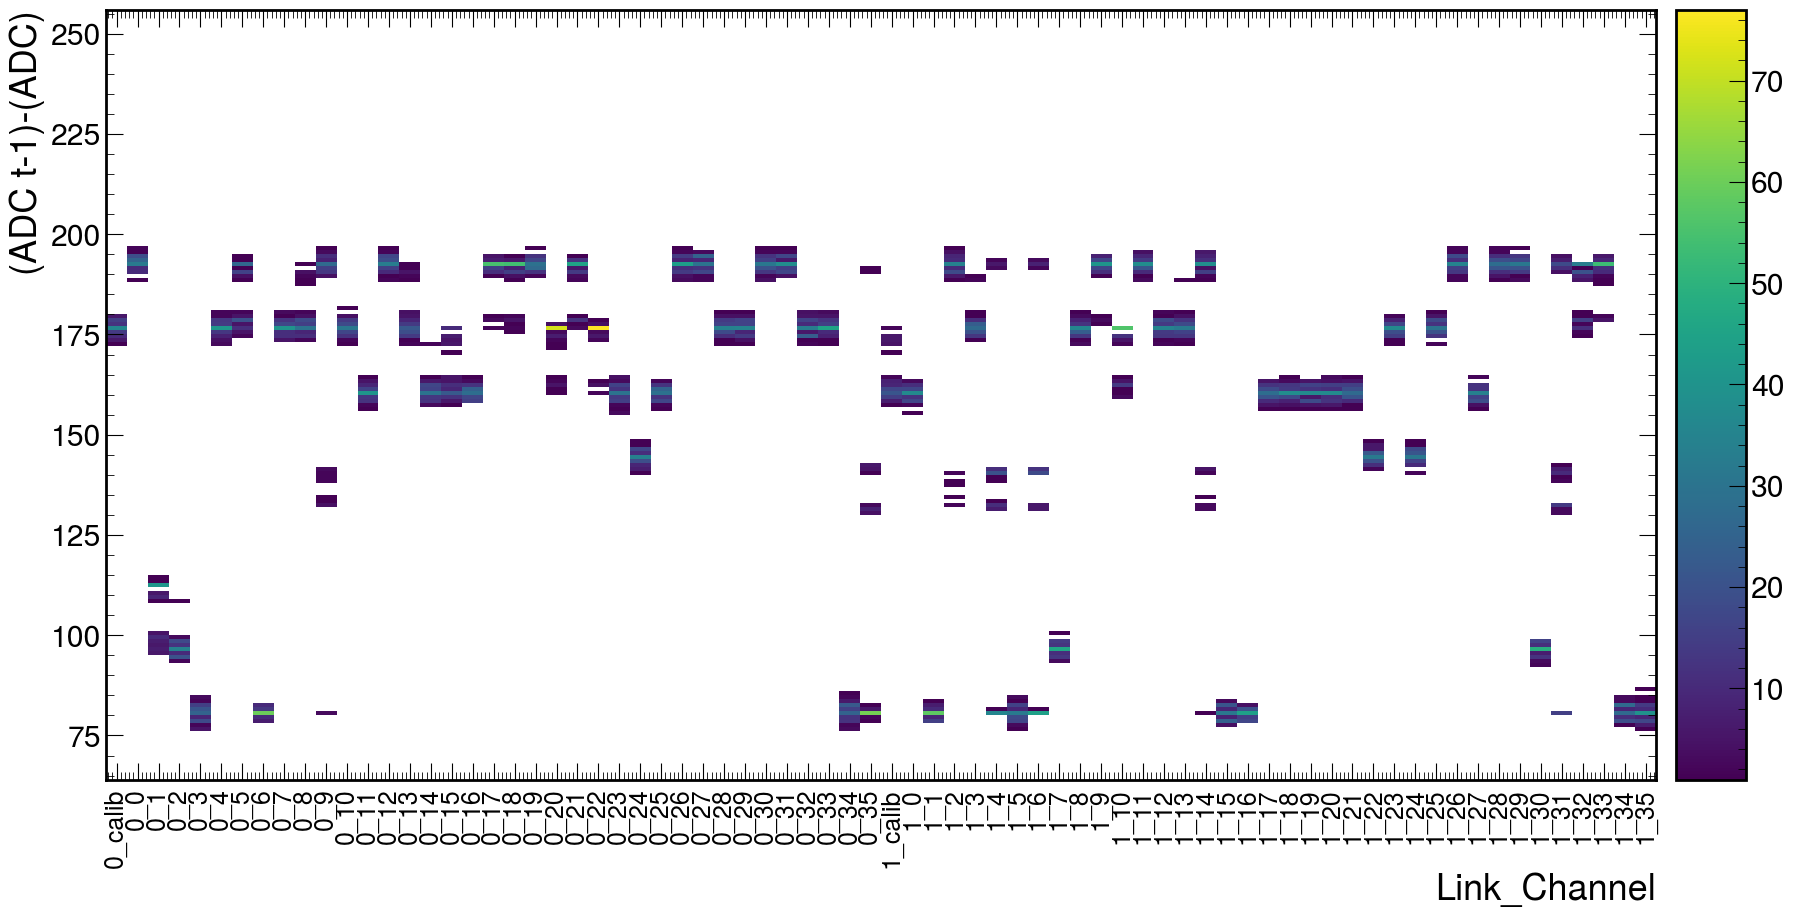

In [24]:
plt.figure(figsize=(20,10))
(
    hist.Hist.new
    .StrCategory(pedestals['uid'].unique(), label='Link_Channel')
    .Reg(256-64,64,256,label='(ADC t-1)-(ADC)')
    .Double()
).fill(
    pedestals.uid,
    pedestals.adc_tm1-pedestals.adc
).plot2d(
    cmin=1,
    cbarsize=0.7
)
plt.xticks(rotation=90, size='x-small')
plt.show()

In [15]:
pedestals.toa.unique()

array([259,   3, 514, 770, 515, 771,   2, 258])

## Distributions

Even though the ranges of these values appear wrong, we can look at the distributions to see if they align with our expectations.

In [8]:
def fill_and_plot_all_channels(
    xname, xlabel, xmin, xmax, rebin=1
):
    plt.figure(figsize=(20,10))
    (
        hist.Hist.new
        .StrCategory(pedestals['uid'].unique(), label='Link_Channel')
        .Reg((xmax-xmin)//rebin,xmin,xmax, label=xlabel)
        .Double()
    ).fill(
        pedestals['uid'],
        pedestals[xname]
    ).plot2d(
        cmin=1,
        cbarsize=0.7
    )
    plt.xticks(rotation=90, size='x-small')
    plt.show()

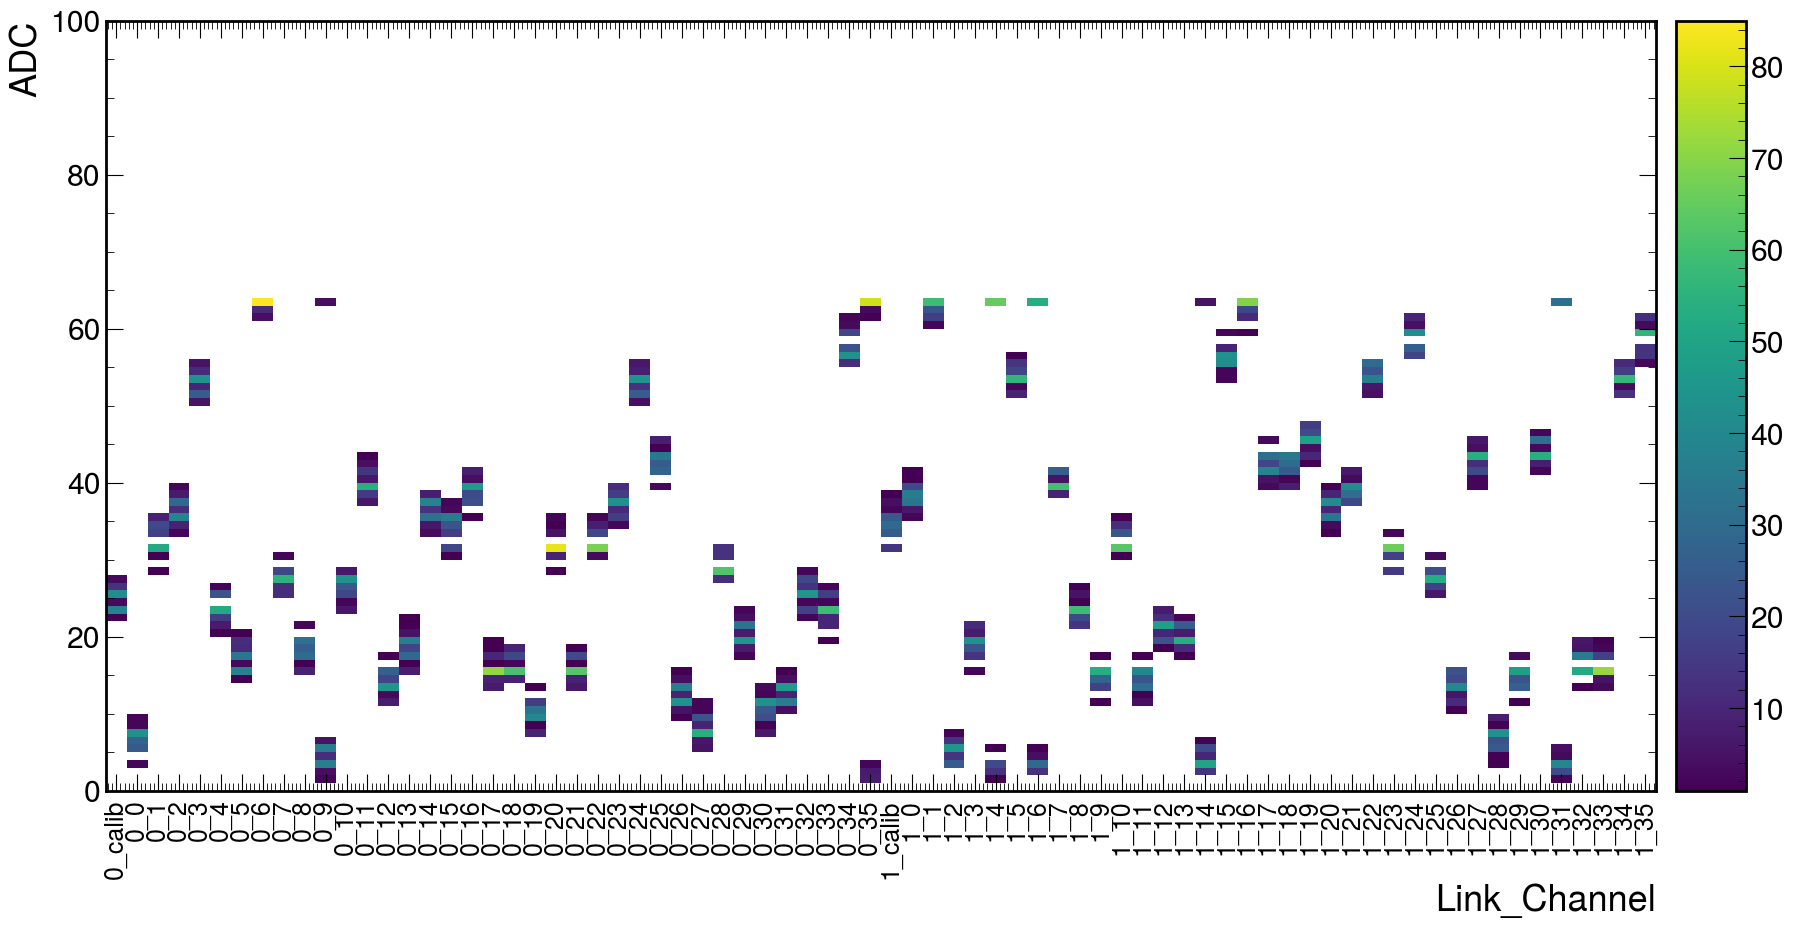

In [9]:
fill_and_plot_all_channels('adc','ADC',0,100)

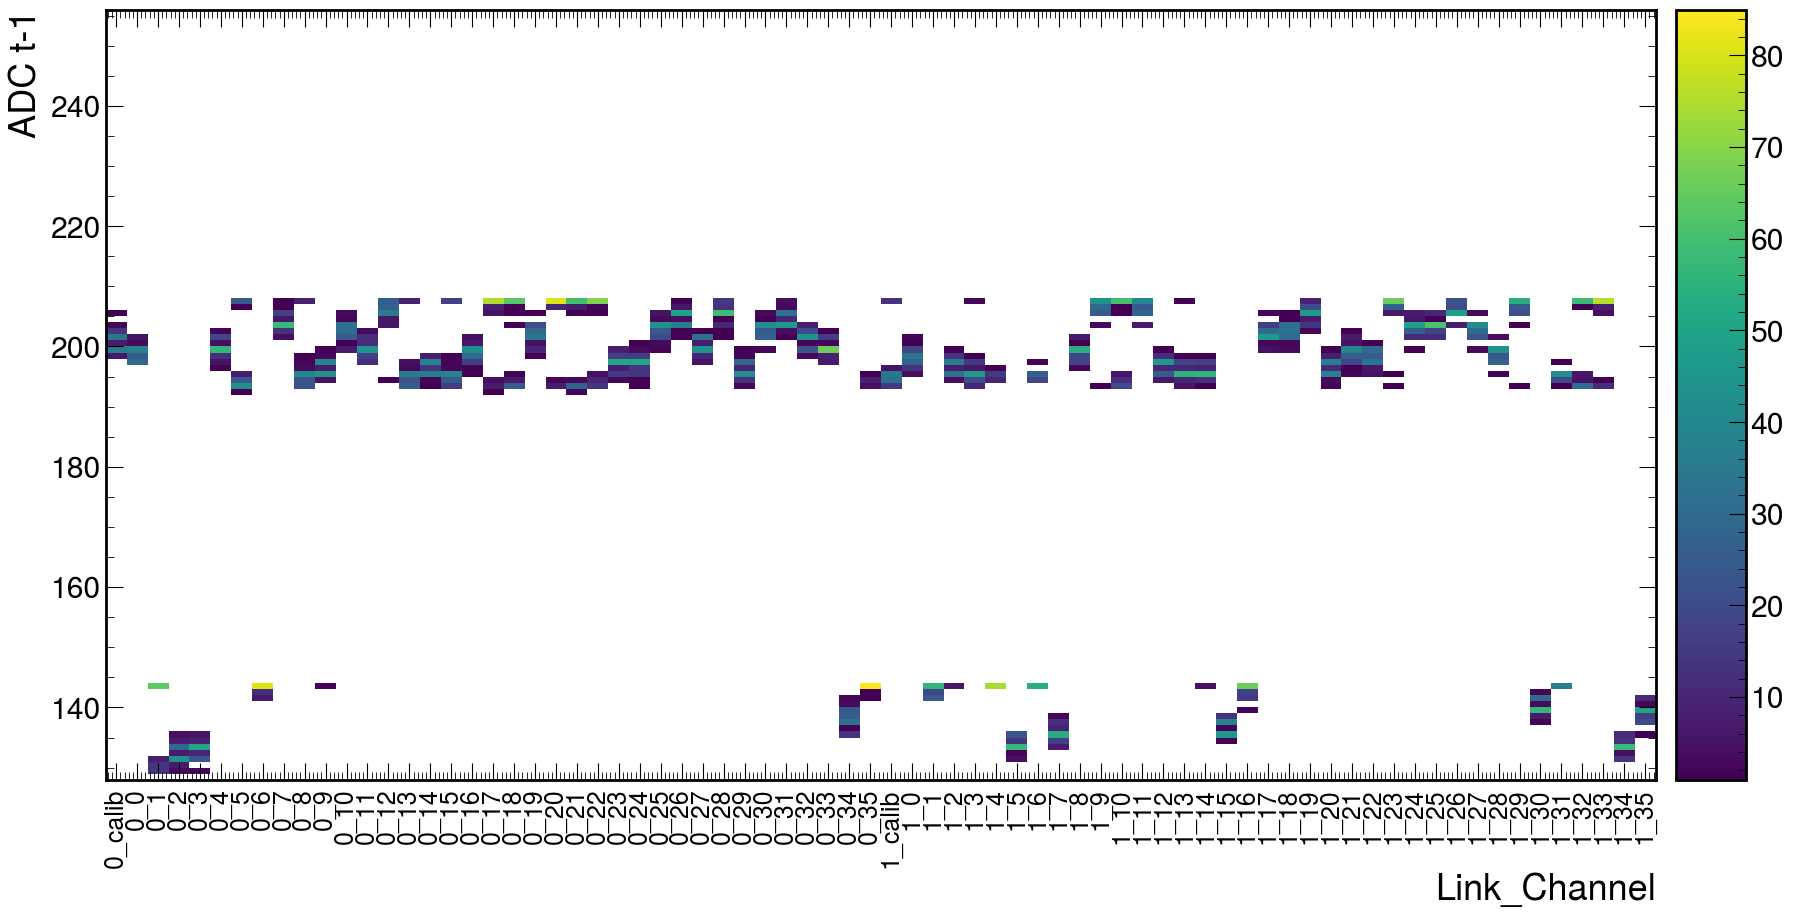

In [10]:
fill_and_plot_all_channels('adc_tm1','ADC t-1',128,256)

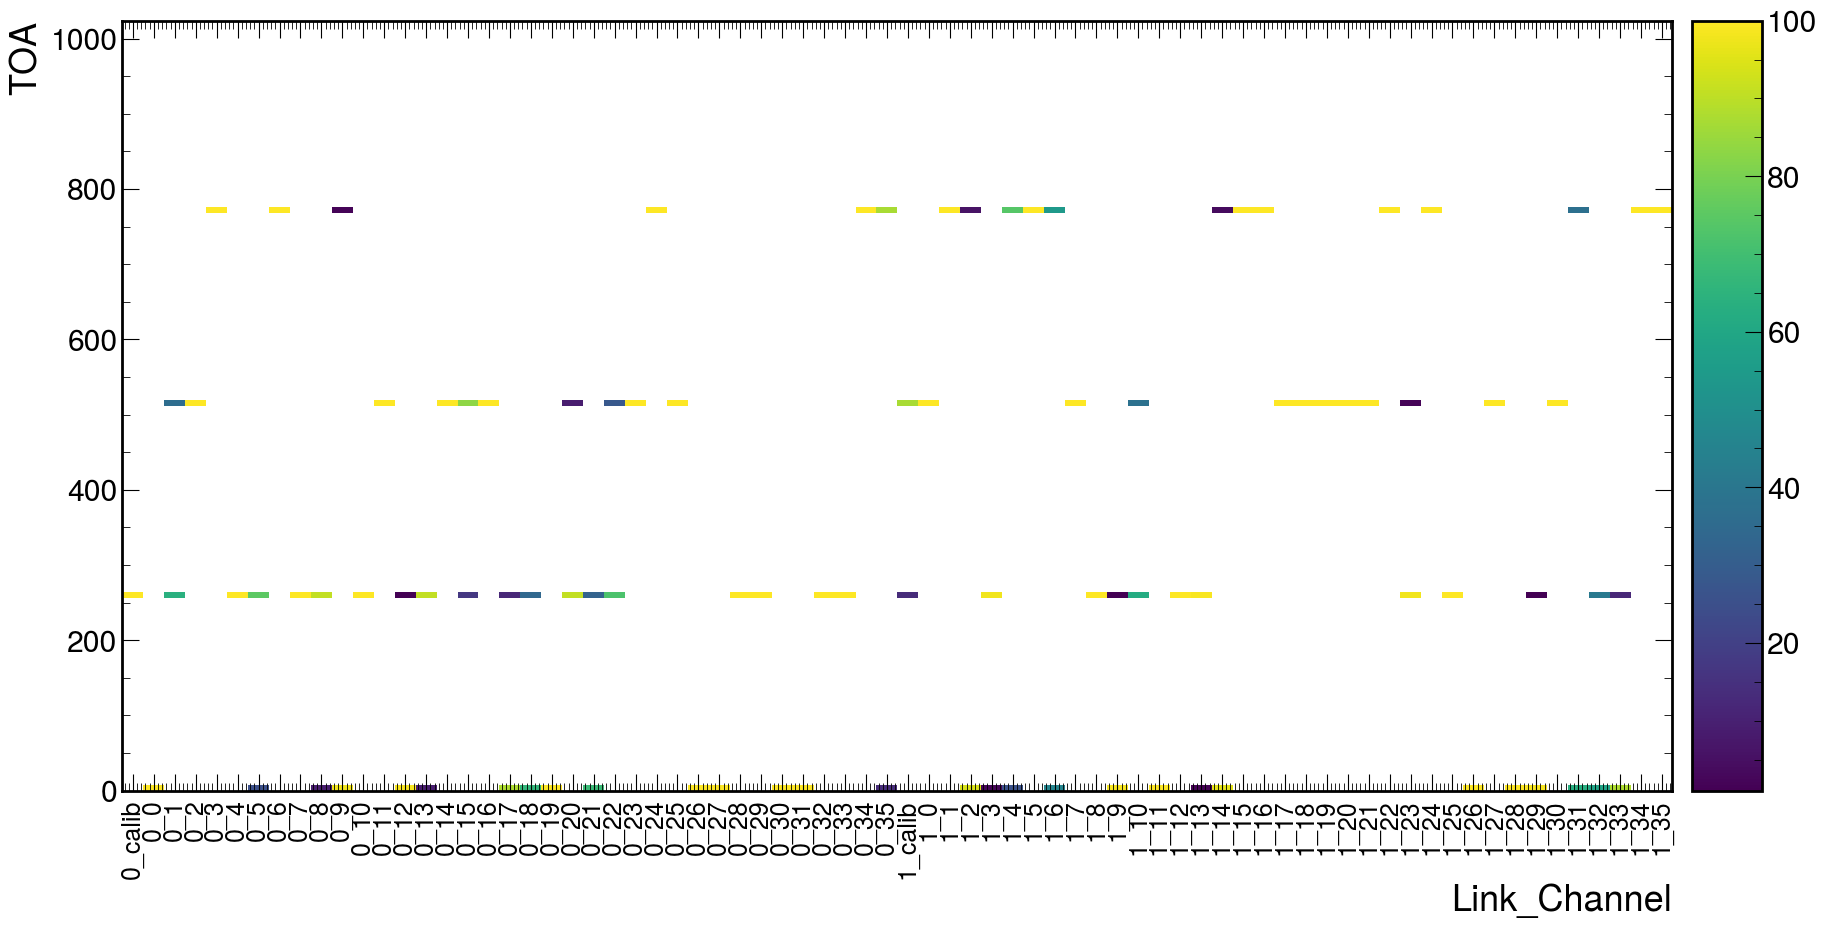

In [11]:
fill_and_plot_all_channels('toa','TOA',0,1024,rebin=8)